### OpenCVで画像の輪郭輸出

100 18 99 87


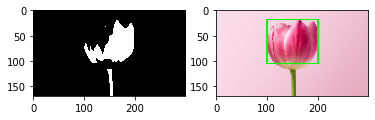

In [4]:
import cv2
import matplotlib.pyplot as plt

# 画像を読み込んでリサイズ
img = cv2.imread("flower.jpg")
img = cv2.resize(img, (300, 169)) # 画像を　300×169ピクセルにリサイズ

# 色空間を二値化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 画像をグレイに変換
gray = cv2.GaussianBlur(gray, (7, 7), 0)
# 平滑化　cv2.GaussianBlur(img, (ax,ay), sigma_x) (ax,ay)は画素の周囲のサイズをピクセル単位で指定 sigma_xは、横方向の標準偏差を指定。０を指定した場合、カーネルのサイズから自動的に計算される　画像を平滑化（細かい模様などを検出しないようにぼかす）
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1] # threshold（）画像を二値化

# 画像左側に二値化した画像を出力
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

# 輪郭を輸出
cnts = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

# 輸出した枠を追加
for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    # 大きすぎたり小さすぎる領域を除去
    if w < 30 or w > 200: continue
    print(x,y,w,h)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
# 画像右側に輸出結果を出力
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.png", dpi=200)
plt.show()